In [1]:
from matplotlib import pyplot as plt
from importlib import reload
from utils import *

C:\Users\Alekseyl\Envs\absa\lib\site-packages\gensim\utils.py:855: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [6]:
from jupyterthemes import jtplot
# jtplot.style()  # development
jtplot.reset()  # production

In [3]:
w2v = load_w2v()

Loading real w2v...
Done


Loading tokenizer...
-- ACD:
Loading dataset...
Training...
Evaluating...
   Step        F1
0  0.01  0.398511
1  0.06  0.584966
2  0.11  0.643046
3  0.16  0.667427
4  0.21  0.681265
5  0.26  0.688959
6  0.31  0.691808
7  0.36  0.694426
8  0.41  0.707182
9  0.46  0.701977


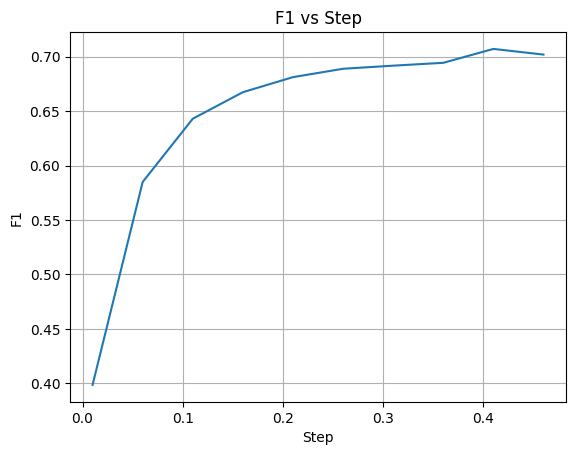

F1: 0.7071823204419889


In [21]:
import acd
reload(acd)
acd_ = acd.ACD(w2v)
acd_.train_acd()